🔄 Training Holt-Winters Exponential Smoothing Model...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


✅ Model training complete! Model saved as 'model.pkl'.
📈 Generating 744-hour forecast...
✅ Predictions saved as 'predictions.csv'.


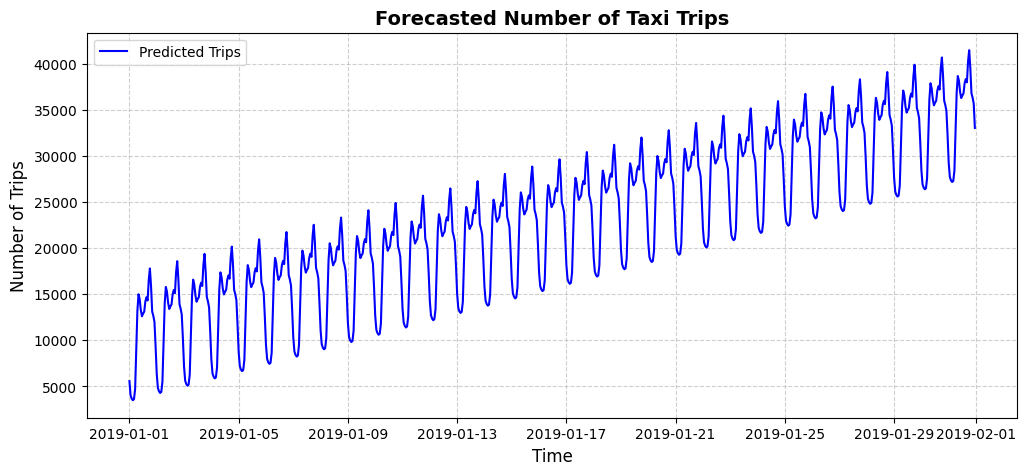

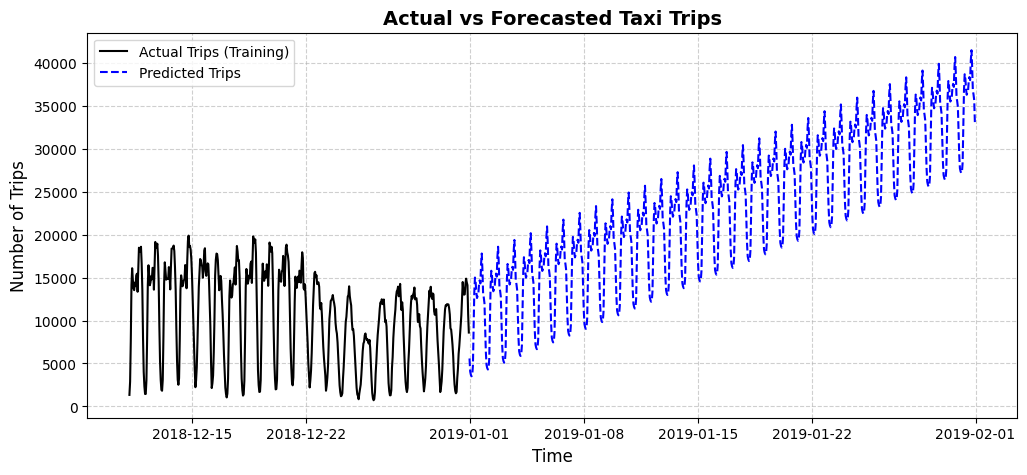

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
import pickle

# =========================
# 📌 Load & Process Training Data
# =========================
train_url = "https://raw.githubusercontent.com/dustywhite7/econ8310-assignment1/main/assignment_data_train.csv"
train_data = pd.read_csv(train_url)

# Ensure correct timestamp column name
if 'Timestamp' in train_data.columns:
    train_data.rename(columns={'Timestamp': 'timestamp'}, inplace=True)

# Convert timestamp column to datetime format and set as index
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])
train_data.set_index('timestamp', inplace=True)

# Ensure dataset follows an hourly frequency
train_data = train_data.asfreq('h')

# Select the dependent variable (number of taxi trips)
y_train = train_data['trips']

# ============================
# 📌 Train Exponential Smoothing Model
# ============================
print("🔄 Training Holt-Winters Exponential Smoothing Model...")

model = ExponentialSmoothing(
    y_train,
    trend="add",
    seasonal="add",
    seasonal_periods=24  # 24-hour seasonal pattern (hourly data)
)

# Fit the model
modelFit = model.fit()

# Save the trained model
with open("model.pkl", "wb") as f:
    pickle.dump(modelFit, f)

print("✅ Model training complete! Model saved as 'model.pkl'.")

# =========================
# 📌 Load & Process Test Data
# =========================
test_url = "https://raw.githubusercontent.com/dustywhite7/econ8310-assignment1/main/assignment_data_test.csv"
test_data = pd.read_csv(test_url)

# Ensure correct timestamp column name in test data
if 'Timestamp' in test_data.columns:
    test_data.rename(columns={'Timestamp': 'timestamp'}, inplace=True)

# Convert test timestamp column to datetime format and set as index
test_data['timestamp'] = pd.to_datetime(test_data['timestamp'])
test_data.set_index('timestamp', inplace=True)

# Ensure dataset follows an hourly frequency
test_data = test_data.asfreq('h')

# ============================
# 📌 Generate Forecast for 744 Hours
# ============================
print("📈 Generating 744-hour forecast...")

pred = modelFit.forecast(steps=744)

# Save predictions to CSV
pred.to_csv("predictions.csv")

print("✅ Predictions saved as 'predictions.csv'.")

# ================================
# 📊 Visualize Predictions
# ================================
# Load predictions
pred = pd.read_csv("predictions.csv", index_col=0)
pred.index = pd.to_datetime(pred.index)

# Plot the predictions
plt.figure(figsize=(12, 5))
plt.plot(pred, label="Predicted Trips", color='blue', linewidth=1.5)
plt.title("Forecasted Number of Taxi Trips", fontsize=14, fontweight="bold")
plt.xlabel("Time", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

# ================================
# 📊 Compare Actual vs Predicted
# ================================
plt.figure(figsize=(12, 5))
plt.plot(y_train[-500:], label="Actual Trips (Training)", color='black', linewidth=1.5)  # Last 500 hours of training data
plt.plot(pred, label="Predicted Trips", color='blue', linestyle="dashed", linewidth=1.5)
plt.title("Actual vs Forecasted Taxi Trips", fontsize=14, fontweight="bold")
plt.xlabel("Time", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

